In [1]:
import numpy as np
from matplotlib import pyplot as plt

from dftpy.ions import Ions
from dftpy.formats import io
from dftpy.optimization import Optimization
from dftpy.density import DensityGenerator
from ase.io import read

In [2]:
import os
os.chdir('../..')
path_file = os.getcwd()

In [3]:
path_file

'/Users/valeria/Documents/aiWT/Final_version'

In [4]:
Ks_energy = np.load(path_file+'/Results/EOS/KS_energy.npy')
Ks_Btin = np.asarray(Ks_energy)[0]
Ks_fcc = np.asarray(Ks_energy)[1]
Ks_bcc = np.asarray(Ks_energy)[2]
Ks_8cd = np.asarray(Ks_energy)[3]
Ks_7cd = np.asarray(Ks_energy)[4]
Ks_index_Btin = list(Ks_Btin).index(min(Ks_Btin))
Ks_index_fcc = list(Ks_fcc).index(min(Ks_fcc))
Ks_index_bcc = list(Ks_bcc).index(min(Ks_bcc))
Ks_index_8cd = list(Ks_8cd).index(min(Ks_8cd))
Ks_index_7cd = list(Ks_7cd).index(min(Ks_7cd))

Ks_sh = []
Ks_bct5 = []
Ks_hcp = []
Ks_dhcp = []
Ks_cbcc = []

for i in np.arange(0,30,1):
    with open(path_file+'/ks_calculations/ks_calculations_test_set/DATA_sh/Si_sh'+str(i)+'.out') as D:
        k = [match for match in D if "Total energy" in match]
    KS_sh = str(k).split()[6]
    Ks_sh.append(float(KS_sh))
    with open(path_file+'/ks_calculations/ks_calculations_test_set/DATA_bct5/Si_bct5'+str(i)+'.out') as D:
        k = [match for match in D if "Total energy" in match]
    KS_bct5 = str(k).split()[6]
    Ks_bct5.append(float(KS_bct5))
    with open(path_file+'/ks_calculations/ks_calculations_test_set/DATA_hcp/Si_hcp'+str(i)+'.out') as A:
        k = [match for match in A if "Total energy" in match]
    KS_hcp = str(k).split()[6]
    Ks_hcp.append(float(KS_hcp))
    with open(path_file+'/ks_calculations/ks_calculations_test_set/DATA_dhcp/Si_dhcp'+str(i)+'.out') as D:
        k = [match for match in D if "Total energy" in match]
    KS_dhcp = str(k).split()[6]
    Ks_dhcp.append(float(KS_dhcp))
    with open(path_file+'/ks_calculations/ks_calculations_test_set/DATA_cbcc/qe_calculations/si_'+str(i)+'.out') as D:
        k = [match for match in D if "!    total energy" in match]
    KS_cbcc = str(k).split()[4]
    Ks_cbcc.append(float(KS_cbcc))

Ks_index_sh = list(Ks_sh).index(min(Ks_sh))
Ks_index_bct5 = 9#list(Ks_bct5).index(min(Ks_bct5))
Ks_index_hcp = list(Ks_hcp).index(min(Ks_hcp))
Ks_index_dhcp = list(Ks_dhcp).index(min(Ks_dhcp))
# Ks_index_cbcc = list(Ks_cbcc).index(min(Ks_cbcc))


Ks_index = np.hstack((Ks_index_Btin, Ks_index_fcc, Ks_index_bcc, Ks_index_8cd, Ks_index_7cd, Ks_index_sh, Ks_index_bct5, Ks_index_hcp, Ks_index_dhcp))#, Ks_index_cbcc))

KS_rho_Btin = io.read_density(path_file+'/ks_calculations/Si_Btin/DATA2/rho0'+str(Ks_index[0])+'.xsf')
KS_rho_fcc  = io.read_density(path_file+'/ks_calculations/Si_fcc/DATA2/rho0'+str(Ks_index[1])+'.xsf')
KS_rho_bcc  = io.read_density(path_file+'/ks_calculations/Si_bcc/DATA2/rho0'+str(Ks_index[2])+'.xsf')
KS_rho_8cd  = io.read_density(path_file+'/ks_calculations/Si_8cd/DATA2/rho0'+str(Ks_index[3])+'.xsf')
KS_rho_7cd  = io.read_density(path_file+'/ks_calculations/Si_7cd/DATA2/rho0'+str(Ks_index[4])+'.xsf')
KS_rho_sh   = io.read_density(path_file+'/ks_calculations/ks_calculations_test_set/DATA_sh/rho0_sh_'+str(Ks_index[5])+'.xsf')
KS_rho_bct5 = io.read_density(path_file+'/ks_calculations/ks_calculations_test_set/DATA_bct5/rho0_bct5_'+str(Ks_index[6])+'.xsf')
KS_rho_hcp  = io.read_density(path_file+'/ks_calculations/ks_calculations_test_set/DATA_hcp/rho0_hcp_'+str(Ks_index[7])+'.xsf')
KS_rho_dhcp = io.read_density(path_file+'/ks_calculations/ks_calculations_test_set/DATA_dhcp/rho0_dhcp_'+str(Ks_index[8])+'.xsf')
# KS_rho_cbcc = io.read_density('/Users/Valeria/Documents/aiWT/Model_ML_function/Ks_calculations/DATA_cbcc/rho0_cbcc_'+str(Ks_index[5])+'.xsf')

In [5]:
Ks_index_bct5 = list(Ks_bct5).index(min(Ks_bct5))


In [6]:
WT_rho_Btin = io.read_density(path_file+'/Results/Densities/Densities_WT/WT_rho0_Si_Btin_'+str(Ks_index_Btin)+'.xsf')
WT_rho_bct5 = io.read_density(path_file+'/Results/Densities/Densities_WT/WT_rho0_Si_BCT5_'+str(Ks_index_bct5)+'.xsf')
WT_rho_8cd  = io.read_density(path_file+'/Results/Densities/Densities_WT/WT_rho0_Si_8cd_'+str(Ks_index_8cd)+'.xsf')
WT_rho_fcc  = io.read_density(path_file+'/Results/Densities/Densities_WT/WT_rho0_Si_fcc_'+str(Ks_index_fcc)+'.xsf')
WT_rho_bcc  = io.read_density(path_file+'/Results/Densities/Densities_WT/WT_rho0_Si_BCC_'+str(Ks_index_bcc)+'.xsf')
WT_rho_sh   = io.read_density(path_file+'/Results/Densities/Densities_WT/WT_rho0_Si_SH_'+str(Ks_index_sh)+'.xsf')
WT_rho_dhcp = io.read_density(path_file+'/Results/Densities/Densities_WT/WT_rho0_Si_dhcp_'+str(Ks_index_dhcp)+'.xsf')
WT_rho_hcp  = io.read_density(path_file+'/Results/Densities/Densities_WT/WT_rho0_Si_HCP_'+str(Ks_index_8cd)+'.xsf')


In [7]:
import numpy as np
from matplotlib import pyplot as plt

from ase.io import read
from ase.lattice.spacegroup import Spacegroup
from ase.lattice.spacegroup import crystal

from scipy.optimize import minimize

from dftpy.ions import Ions
from dftpy.functional import Functional
from dftpy.formats import io
from dftpy.ions import Ions
from dftpy.field import DirectField
from dftpy.grid import DirectGrid
from dftpy.functional import LocalPseudo, Functional, TotalFunctional, ExternalPotential
from dftpy.formats import io
from dftpy.math_utils import ecut2nr
from dftpy.optimization import Optimization
import ase
from ase.build import bulk
path_pp='/Users/valeria/Documents/PP/ofpp/EAC/upf/blps/'
file='si.lda.upf'
PP_list = {'Si': path_pp+file}
XC = Functional(type='XC',name='LDA')
HARTREE = Functional(type='HARTREE')

/opt/homebrew/lib/python3.11/site-packages/ase/lattice/spacegroup.py:5: UserWarning: Moved to ase.spacegroup
  warnings.warn('Moved to ase.spacegroup')


In [8]:
rho0_bct5_DEN_wt = [0.06900083,0.06255148,0.05745174,0.05293614,0.04895279,0.04262975,0.0389589 ,0.03619192,0.03375811,0.03177499,0.03022887,0.02891853,0.02840704,0.02788642,0.02790464,0.02908319,0.03084631,0.03255065,0.03191184,0.03371278,0.03336661,0.03390128,0.03446173,0.03473932,0.03516789,0.03531672,0.03486211,0.03582237,0.03545685,0.03604892]
rho0_bct5_DEN_wt[Ks_index_bct5]

0.03022887

In [9]:
def min_delta_rho(rho_ks, ions):
#     r = args
    nr = rho_ks.grid.nr
    KE = Functional(type='KEDF',name='WT', rho0=0.03022887)
    ions.set_charges(4)
    grid = DirectGrid(lattice=ions.cell, nr=[nr[0], nr[1], nr[2]])
    rho_ini = DirectField(grid=grid)
    rho_ini[:] = ions.get_ncharges()/ions.cell.volume
    PSEUDO = LocalPseudo(grid = grid, ions=ions, PP_list=PP_list, rcut=10)
    evaluator = TotalFunctional(KE=KE, XC=XC, HARTREE=HARTREE, PSEUDO=PSEUDO)
    optimization_options = {'econv' : 1e-5*ions.nat}
    opt = Optimization(EnergyEvaluator=evaluator, optimization_options = optimization_options, 
                       optimization_method = 'TN')
    rho = opt.optimize_rho(guess_rho=rho_ini)
    rho_ini[:]=rho
    diff = np.abs(rho - rho_ks)
    print(diff)
    return diff

In [12]:
ions_bct5, WT_rho_bct5,  _ = io.read_all('/Users/Valeria/Documents/aiWT/Model_ML_function/test_set_data/density_results_test_set/WT_rho0_Si_BCT5_'+str(Ks_index_bct5)+'.xsf')
# ions_bct5, cwt_rho_bct5_DEN, _ = io.read_all('/Users/valeria/Documents/aiWT/Model_ML_function/Densitie_DEN/rho_6_'+str(Ks_index_bct5)+'.xsf')
# ions_bct5, cwt_rho_bct5_TE, _ = io.read_all('/Users/valeria/Documents/aiWT/Model_ML_function/Densities_ENE/rho_6_'+str(Ks_index_bct5)+'.xsf')
# ions_bct5, cwt_rho_bct5_KE, _ = io.read_all('/Users/valeria/Documents/aiWT/Model_ML_function/Densities_KEN/rho_6_'+str(Ks_index_bct5)+'.xsf')


In [13]:
delta_rho_bct5_den = min_delta_rho(KS_rho_bct5, ions_bct5)


setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.458307798214E+01     -1.458308E+01   3.178202E+00    1       1       7.024693E-02    
1       -1.604745635571E+01     -1.464378E+00   9.933994E-01    13      2       2.979758E-01    
2       -1.606709483857E+01     -1.963848E-02   7.470344E-02    7       1       3.778079E-01    
3       -1.607106334673E+01     -3.968508E-03   8.760494E-03    12      1       4.998128E-01    
4       -1.607155200284E+01     -4.886561E-04   1.980167E-03    12      1       6.144528E-01    
5       -1.607169734783E+01     -1.453450E-04   1.644409E-04    17      1       7.775228E-01    
6       -1.607170294416E+01     -5.596327E-06   1.434501E-05    10      1       8.781619E-01    
7       -1.607170331284E+01     -3.686804E-07   4.847949E-06    12      1       9.905338E-01    
#### Density Optimization Converged ####
Chemical p

In [14]:
delta_rho_bct5_den.write('delta_bct5_den.xsf', ions=ions_bct5)

In [15]:
cwt_rho_Btin_TE = io.read_density(path_file+'/Results/Densities/Densities_ENE/rho_0_'+str(Ks_index_Btin)+'.xsf')
cwt_rho_fcc_TE  = io.read_density(path_file+'/Results/Densities/Densities_ENE/rho_1_'+str(Ks_index_fcc)+'.xsf')
cwt_rho_bcc_TE  = io.read_density(path_file+'/Results/Densities/Densities_ENE/rho_2_'+str(Ks_index_bcc)+'.xsf')
cwt_rho_8cd_TE  = io.read_density(path_file+'/Results/Densities/Densities_ENE/rho_3_'+str(Ks_index_8cd)+'.xsf')
cwt_rho_sh_TE   = io.read_density(path_file+'/Results/Densities/Densities_ENE/rho_7_'+str(Ks_index_sh)+'.xsf')
cwt_rho_bct5_TE = io.read_density(path_file+'/Results/Densities/Densities_ENE/rho_6_'+str(9)+'.xsf')
cwt_rho_hcp_TE  = io.read_density(path_file+'/Results/Densities/Densities_ENE/rho_5_'+str(Ks_index_hcp)+'.xsf')
cwt_rho_dhcp_TE = io.read_density(path_file+'/Results/Densities/Densities_ENE/rho_4_'+str(Ks_index_dhcp)+'.xsf')
# aiwt_rho_cbcc_TE = io.read_density('/Users/valeria/Documents/aiWT/Model_ML_function/Densities_ENE/rho_cbcc_TE_'+str(Ks_index_cbcc)+'.xsf')

In [16]:
cwt_rho_Btin_KE = io.read_density(path_file+'/Results/Densities/Densities_KEN/rho_0_'+str(Ks_index_Btin)+'.xsf')
cwt_rho_fcc_KE  = io.read_density(path_file+'/Results/Densities/Densities_KEN/rho_1_'+str(Ks_index_fcc)+'.xsf')
cwt_rho_bcc_KE  = io.read_density(path_file+'/Results/Densities/Densities_KEN/rho_2_'+str(Ks_index_bcc)+'.xsf')
cwt_rho_8cd_KE  = io.read_density(path_file+'/Results/Densities/Densities_KEN/rho_3_'+str(Ks_index_8cd)+'.xsf')
cwt_rho_sh_KE   = io.read_density(path_file+'/Results/Densities/Densities_KEN/rho_7_'+str(Ks_index_sh)+'.xsf')
cwt_rho_bct5_KE = io.read_density(path_file+'/Results/Densities/Densities_KEN/rho_6_'+str(9)+'.xsf')
cwt_rho_hcp_KE  = io.read_density(path_file+'/Results/Densities/Densities_KEN/rho_5_'+str(Ks_index_hcp)+'.xsf')
cwt_rho_dhcp_KE = io.read_density(path_file+'/Results/Densities/Densities_KEN/rho_4_'+str(Ks_index_dhcp)+'.xsf')
# aiwt_rho_cbcc_KE = io.read_density('/Users/valeria/Documents/aiWT/Model_ML_function/Densities_KEN/rho_cbcc_KE_'+str(Ks_index_cbcc)+'.xsf')

In [17]:
cwt_rho_Btin_DEN = io.read_density(path_file+'/Results/Densities/Densitie_DEN/rho_0_'+str(Ks_index_Btin)+'.xsf')
cwt_rho_fcc_DEN  = io.read_density(path_file+'/Results/Densities/Densitie_DEN/rho_1_'+str(Ks_index_fcc)+'.xsf')
cwt_rho_bcc_DEN  = io.read_density(path_file+'/Results/Densities/Densitie_DEN/rho_2_'+str(Ks_index_bcc)+'.xsf')
cwt_rho_8cd_DEN  = io.read_density(path_file+'/Results/Densities/Densitie_DEN/rho_3_'+str(Ks_index_8cd)+'.xsf')
cwt_rho_sh_DEN   = io.read_density(path_file+'/Results/Densities/Densitie_DEN/rho_7_'+str(Ks_index_sh)+'.xsf')
cwt_rho_bct5_DEN = io.read_density(path_file+'/Results/Densities/Densitie_DEN/rho_6_'+str(9)+'.xsf')
cwt_rho_hcp_DEN  = io.read_density(path_file+'/Results/Densities/Densitie_DEN/rho_5_'+str(Ks_index_hcp)+'.xsf')
cwt_rho_dhcp_DEN = io.read_density(path_file+'/Results/Densities/Densitie_DEN/rho_4_'+str(Ks_index_dhcp)+'.xsf')
# aiwt_rho_cbcc_DEN = io.read_density('/Users/valeria/Documents/aiWT/Model_ML_function/Densitie_DEN/rho_cbcc_KE_'+str(Ks_index_cbcc)+'.xsf')

In [18]:
aiwt_d_Btin_TE = cwt_rho_Btin_TE.get_cut(r0=[1,1,1], origin=[0,0,0], nr=100, basis='crystal')
aiwt_d_fcc_TE  = cwt_rho_fcc_TE.get_cut(r0=[0,1,1], origin=[0,0,0], nr=100, basis='crystal')
aiwt_d_bcc_TE  = cwt_rho_bcc_TE.get_cut(r0=[1,1,1], origin=[0,0,0], nr=100, basis='crystal')
aiwt_d_8cd_TE  = cwt_rho_8cd_TE.get_cut(r0=[1,1,1], origin=[0,0,0], nr=100, basis='crystal')
aiwt_d_sh_TE   = cwt_rho_sh_TE.get_cut(r0=[1,1,1], origin=[0,0,0], nr=100, basis='crystal')
aiwt_d_bct5_TE = cwt_rho_bct5_TE.get_cut(r0=[0,0,1], origin=[0,0,0], nr=100, basis='crystal')
aiwt_d_hcp_TE  = cwt_rho_hcp_TE.get_cut(r0=[1,1,1], origin=[0,0,0], nr=100, basis='crystal')
aiwt_d_dhcp_TE = cwt_rho_dhcp_TE.get_cut(r0=[1,1,1], origin=[0,0,0], nr=100, basis='crystal')
# aiwt_d_cbcc_TE = aiwt_rho_cbcc_TE.get_cut(r0=[1,1,1], origin=[0,0,0], nr=100, basis='crystal')

aiwt_d_Btin_KE = cwt_rho_Btin_KE.get_cut(r0=[1,1,1], origin=[0,0,0], nr=100, basis='crystal')
aiwt_d_fcc_KE  = cwt_rho_fcc_KE.get_cut(r0=[0,1,1], origin=[0,0,0], nr=100, basis='crystal')
aiwt_d_bcc_KE  = cwt_rho_bcc_KE.get_cut(r0=[1,1,1], origin=[0,0,0], nr=100, basis='crystal')
aiwt_d_8cd_KE  = cwt_rho_8cd_KE.get_cut(r0=[1,1,1], origin=[0,0,0], nr=100, basis='crystal')
aiwt_d_sh_KE   = cwt_rho_sh_KE.get_cut(r0=[1,1,1], origin=[0,0,0], nr=100, basis='crystal')
aiwt_d_bct5_KE = cwt_rho_bct5_KE.get_cut(r0=[0,0,1], origin=[0,0,0], nr=100, basis='crystal')
aiwt_d_hcp_KE  = cwt_rho_hcp_KE.get_cut(r0=[1,1,1], origin=[0,0,0], nr=100, basis='crystal')
aiwt_d_dhcp_KE = cwt_rho_dhcp_KE.get_cut(r0=[1,1,1], origin=[0,0,0], nr=100, basis='crystal')
# aiwt_d_cbcc_KE = aiwt_rho_cbcc_KE.get_cut(r0=[1,1,1], origin=[0,0,0], nr=100, basis='crystal')

aiwt_d_Btin_DEN = cwt_rho_Btin_DEN.get_cut(r0=[1,1,1], origin=[0,0,0], nr=100, basis='crystal')
aiwt_d_fcc_DEN  = cwt_rho_fcc_DEN.get_cut(r0=[0,1,1], origin=[0,0,0], nr=100, basis='crystal')
aiwt_d_bcc_DEN  = cwt_rho_bcc_DEN.get_cut(r0=[1,1,1], origin=[0,0,0], nr=100, basis='crystal')
aiwt_d_8cd_DEN  = cwt_rho_8cd_DEN.get_cut(r0=[1,1,1], origin=[0,0,0], nr=100, basis='crystal')
aiwt_d_sh_DEN   = cwt_rho_sh_DEN.get_cut(r0=[1,1,1], origin=[0,0,0], nr=100, basis='crystal')
aiwt_d_bct5_DEN = cwt_rho_bct5_DEN.get_cut(r0=[0,0,1], origin=[0,0,0], nr=100, basis='crystal')
aiwt_d_hcp_DEN  = cwt_rho_hcp_DEN.get_cut(r0=[1,1,1], origin=[0,0,0], nr=100, basis='crystal')
aiwt_d_dhcp_DEN = cwt_rho_dhcp_DEN.get_cut(r0=[1,1,1], origin=[0,0,0], nr=100, basis='crystal')
# aiwt_d_cbcc_KE = aiwt_rho_cbcc_KE.get_cut(r0=[1,1,1], origin=[0,0,0], nr=100, basis='crystal')

Ks_d_Btin = KS_rho_Btin.get_cut(r0=[1,1,1], origin=[0,0,0], nr=100, basis='crystal')
Ks_d_fcc = KS_rho_fcc.get_cut(r0=[0,1,1], origin=[0,0,0], nr=100, basis='crystal')
Ks_d_bcc = KS_rho_bcc.get_cut(r0=[1,1,1], origin=[0,0,0], nr=100, basis='crystal')
Ks_d_8cd = KS_rho_8cd.get_cut(r0=[1,1,1], origin=[0,0,0], nr=100, basis='crystal')
Ks_d_sh = KS_rho_sh.get_cut(r0=[1,1,1], origin=[0,0,0], nr=100, basis='crystal')
Ks_d_bct5 = KS_rho_bct5.get_cut(r0=[0,0,1], origin=[0,0,0], nr=100, basis='crystal')
Ks_d_hcp = KS_rho_hcp.get_cut(r0=[1,1,1], origin=[0,0,0], nr=100, basis='crystal')
Ks_d_dhcp = KS_rho_dhcp.get_cut(r0=[1,1,1], origin=[0,0,0], nr=100, basis='crystal')
# Ks_d_cbcc = KS_rho_cbcc.get_cut(r0=[1,1,1], origin=[0,0,0], nr=100, basis='crystal')

WT_d_bct5 = WT_rho_bct5.get_cut(r0=[0,0,1], origin=[0,0,0], nr=100, basis='crystal')
WT_d_8cd = WT_rho_8cd.get_cut(r0=[1,1,1], origin=[0,0,0], nr=100, basis='crystal')
WT_d_fcc = WT_rho_fcc.get_cut(r0=[0,1,1], origin=[0,0,0], nr=100, basis='crystal')
WT_d_Btin = WT_rho_Btin.get_cut(r0=[0,0,1], origin=[0,0,0], nr=100, basis='crystal')
WT_d_bcc = WT_rho_bcc.get_cut(r0=[1,1,1], origin=[0,0,0], nr=100, basis='crystal')
WT_d_sh = WT_rho_sh.get_cut(r0=[0,1,1], origin=[0,0,0], nr=100, basis='crystal')
WT_d_hcp = WT_rho_hcp.get_cut(r0=[0,0,1], origin=[0,0,0], nr=100, basis='crystal')
WT_d_dhcp = WT_rho_dhcp.get_cut(r0=[1,1,1], origin=[0,0,0], nr=100, basis='crystal')


In [19]:
Phases = ['Si_Btin', 'Si_fcc', 'Si_bcc', 'Si_cd', 'Si_dhcp', 'Si_hcp', 'Si_bct5', 'Si_sh'] 

# Rho0 from optimizing density

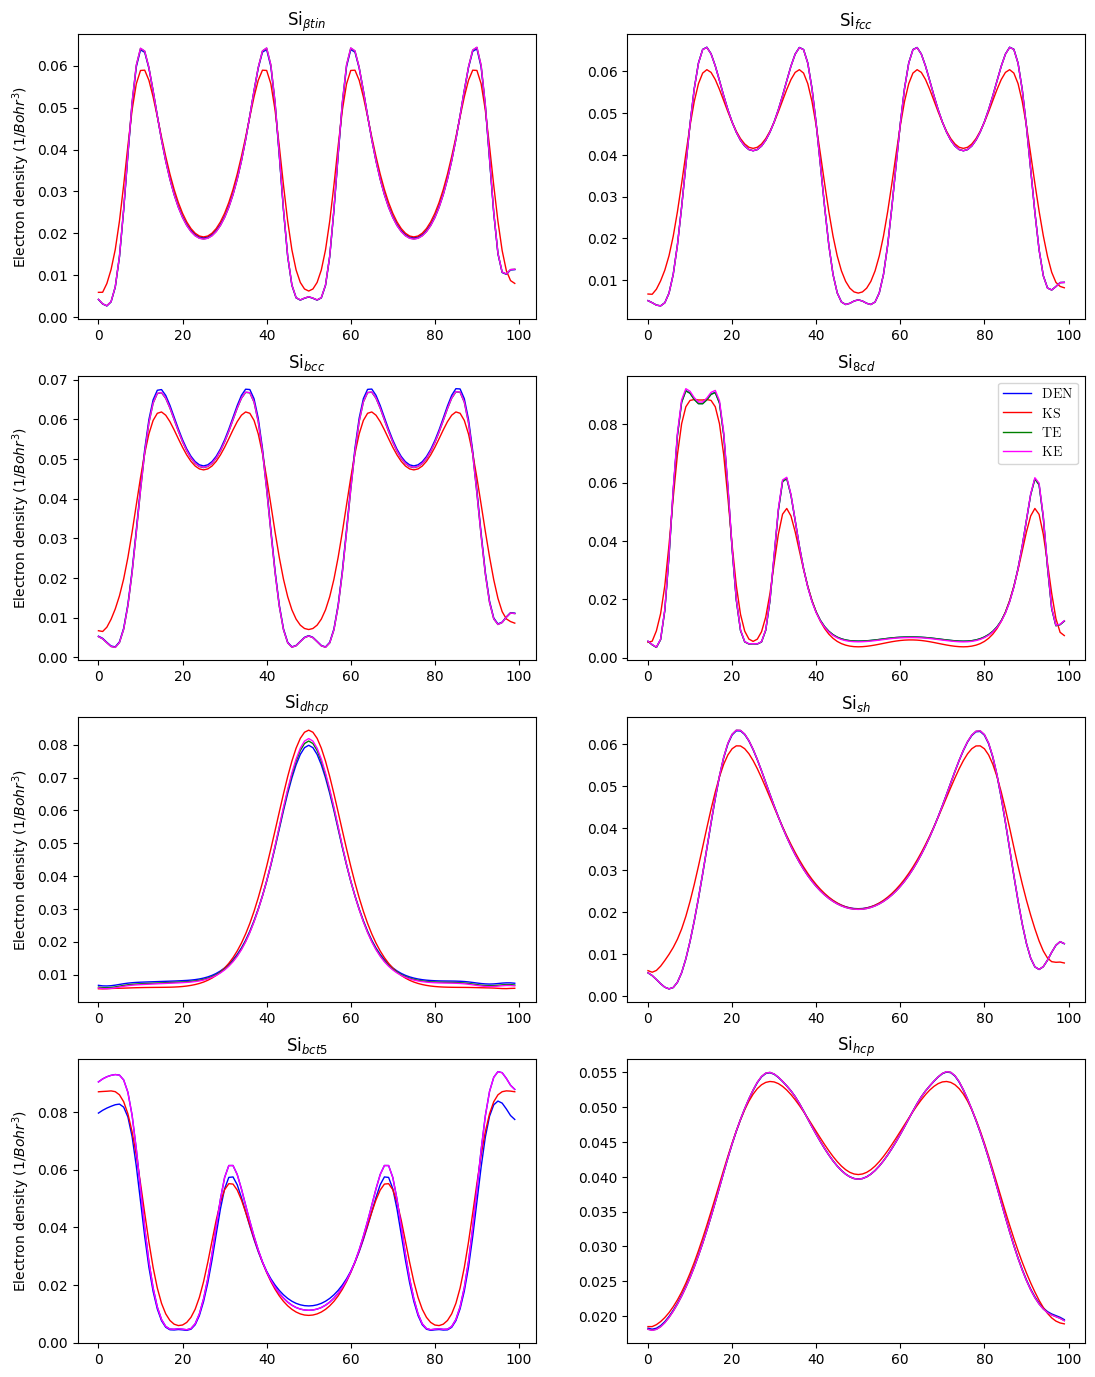

In [20]:
fig, axs = plt.subplots(4,2, figsize=(13,17))
plt.rc('text', usetex=True)
plt.rc('font', family='serif', stretch='condensed')
im0 = axs[0,0].plot(aiwt_d_Btin_DEN.ravel(), linewidth=1, color='blue')
im0 = axs[0,0].plot(Ks_d_Btin.ravel(), linewidth=1, color='red')
im0 = axs[0,0].plot(aiwt_d_Btin_TE.ravel(), linewidth=1, color='green')
im0 = axs[0,0].plot(aiwt_d_Btin_KE.ravel(), linewidth=1, color='magenta')

im1 = axs[0,1].plot(aiwt_d_fcc_DEN.ravel(), linewidth=1, color='blue')
im1 = axs[0,1].plot(Ks_d_fcc.ravel(), linewidth=1, color='red')
im1 = axs[0,1].plot(aiwt_d_fcc_TE.ravel(), linewidth=1, color='green')
im1 = axs[0,1].plot(aiwt_d_fcc_KE.ravel(), linewidth=1, color='magenta')

im2 = axs[1,0].plot(aiwt_d_bcc_DEN.ravel(), linewidth=1, color='blue')
im2 = axs[1,0].plot(Ks_d_bcc.ravel(), linewidth=1, color='red')
im2 = axs[1,0].plot(aiwt_d_bcc_TE.ravel(), linewidth=1, color='green')
im2 = axs[1,0].plot(aiwt_d_bcc_KE.ravel(), linewidth=1, color='magenta')

im3 = axs[1,1].plot(aiwt_d_8cd_DEN.ravel(), linewidth=1, color='blue', label='DEN')
im3 = axs[1,1].plot(Ks_d_8cd.ravel(), linewidth=1, color='red', label='KS')
im3 = axs[1,1].plot(aiwt_d_8cd_TE.ravel(), linewidth=1, color='green', label='TE')
im3 = axs[1,1].plot(aiwt_d_8cd_KE.ravel(), linewidth=1, color='magenta', label='KE')

im4 = axs[2,0].plot(aiwt_d_dhcp_DEN.ravel(), linewidth=1, color='blue')
im4 = axs[2,0].plot(Ks_d_dhcp.ravel(), linewidth=1, color='red')
im4 = axs[2,0].plot(aiwt_d_dhcp_TE.ravel(), linewidth=1, color='green')
im4 = axs[2,0].plot(aiwt_d_dhcp_KE.ravel(), linewidth=1, color='magenta')

im5 = axs[2,1].plot(aiwt_d_sh_DEN.ravel(), linewidth=1, color='blue')
im5 = axs[2,1].plot(Ks_d_sh.ravel(), linewidth=1, color='red')
im5 = axs[2,1].plot(aiwt_d_sh_TE.ravel(), linewidth=1, color='green')
im5 = axs[2,1].plot(aiwt_d_sh_KE.ravel(), linewidth=1, color='magenta')

im6 = axs[3,0].plot(aiwt_d_bct5_DEN.ravel(), linewidth=1, color='blue')
im6 = axs[3,0].plot(Ks_d_bct5.ravel(), linewidth=1, color='red')
im6 = axs[3,0].plot(aiwt_d_bct5_TE.ravel(), linewidth=1, color='blue')
im6 = axs[3,0].plot(aiwt_d_bct5_KE.ravel(), linewidth=1, color='magenta')

im7 = axs[3,1].plot(aiwt_d_hcp_DEN.ravel(), linewidth=1, color='blue')
im7 = axs[3,1].plot(Ks_d_hcp.ravel(), linewidth=1, color='red')
im7 = axs[3,1].plot(aiwt_d_hcp_TE.ravel(), linewidth=1, color='green')
im7 = axs[3,1].plot(aiwt_d_hcp_KE.ravel(), linewidth=1, color='magenta')


# im8 = axs[4,0].plot(aiwt_d_dhcp_DEN.ravel(), linewidth=1, color='green')
# im8 = axs[4,0].plot(Ks_d_dhcp.ravel(), linewidth=1, color='red')

# im9 = axs[4,1].plot(aiwt_d_cbcc.ravel(), linewidth=1, color='green')

axs[0,0].set_title(r'Si$_{\beta tin}$')
axs[0,1].set_title('Si$_{fcc}$')
axs[1,0].set_title('Si$_{bcc}$')
axs[1,1].set_title('Si$_{8cd}$')
axs[2,0].set_title('Si$_{dhcp}$')
axs[2,1].set_title('Si$_{sh}$')
axs[3,0].set_title('Si$_{bct5}$')
axs[3,1].set_title('Si$_{hcp}$')
# axs[4,0].set_title('Si$_{hd}$')

# axs[4,1].set_xlabel('Volume ($\AA^{3}$)')
# axs[4,0].set_xlabel('Volume ($\AA^{3}$)')
axs[0,0].set_ylabel('Electron density (1/$Bohr^{3}$)') #$\u03C1_{0}$
axs[1,0].set_ylabel('Electron density (1/$Bohr^{3}$)')
axs[2,0].set_ylabel('Electron density (1/$Bohr^{3}$)')
axs[3,0].set_ylabel('Electron density (1/$Bohr^{3}$)')
# axs[4,0].set_ylabel('Electron density (1/$Bohr^{3}$)')

axs[1,1].legend()
# resolution_value = 1200
plt.savefig("Densities", format="png", dpi=200)

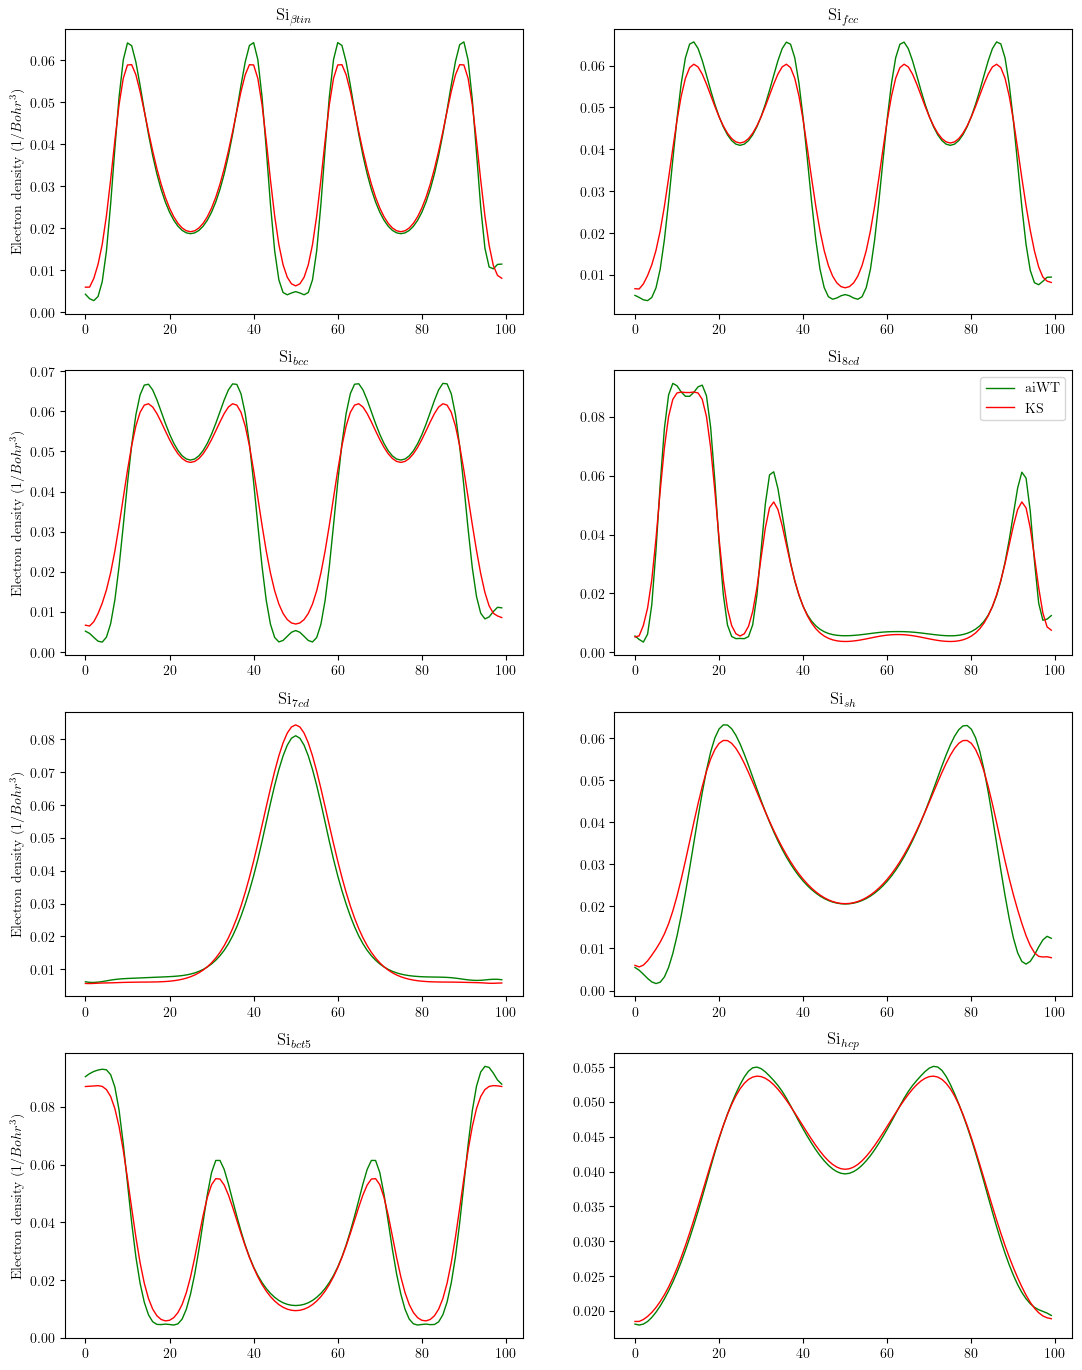

In [21]:
fig, axs = plt.subplots(4,2, figsize=(13,17))
plt.rc('text', usetex=True)
plt.rc('font', family='serif', stretch='condensed')
im0 = axs[0,0].plot(aiwt_d_Btin_TE.ravel(), linewidth=1, color='green')
im0 = axs[0,0].plot(Ks_d_Btin.ravel(), linewidth=1, color='red')

im1 = axs[0,1].plot(aiwt_d_fcc_TE.ravel(), linewidth=1, color='green')
im1 = axs[0,1].plot(Ks_d_fcc.ravel(), linewidth=1, color='red')

im2 = axs[1,0].plot(aiwt_d_bcc_TE.ravel(), linewidth=1, color='green')
im2 = axs[1,0].plot(Ks_d_bcc.ravel(), linewidth=1, color='red')

im3 = axs[1,1].plot(aiwt_d_8cd_TE.ravel(), linewidth=1, color='green')
im3 = axs[1,1].plot(Ks_d_8cd.ravel(), linewidth=1, color='red')

im4 = axs[2,0].plot(aiwt_d_dhcp_TE.ravel(), linewidth=1, color='green')
im4 = axs[2,0].plot(Ks_d_dhcp.ravel(), linewidth=1, color='red')

im5 = axs[2,1].plot(aiwt_d_sh_TE.ravel(), linewidth=1, color='green')
im5 = axs[2,1].plot(Ks_d_sh.ravel(), linewidth=1, color='red')

im6 = axs[3,0].plot(aiwt_d_bct5_TE.ravel(), linewidth=1, color='green')
im6 = axs[3,0].plot(Ks_d_bct5.ravel(), linewidth=1, color='red')

im7 = axs[3,1].plot(aiwt_d_hcp_TE.ravel(), linewidth=1, color='green')
im7 = axs[3,1].plot(Ks_d_hcp.ravel(), linewidth=1, color='red')

# im8 = axs[4,0].plot(aiwt_d_dhcp_DEN.ravel(), linewidth=1, color='green')
# im8 = axs[4,0].plot(Ks_d_dhcp.ravel(), linewidth=1, color='red')

# im9 = axs[4,1].plot(aiwt_d_cbcc.ravel(), linewidth=1, color='green')

axs[0,0].set_title(r'Si$_{\beta tin}$')
axs[0,1].set_title('Si$_{fcc}$')
axs[1,0].set_title('Si$_{bcc}$')
axs[1,1].set_title('Si$_{8cd}$')
axs[2,0].set_title('Si$_{7cd}$')
axs[2,1].set_title('Si$_{sh}$')
axs[3,0].set_title('Si$_{bct5}$')
axs[3,1].set_title('Si$_{hcp}$')
# axs[4,0].set_title('Si$_{hd}$')

# axs[4,1].set_xlabel('Volume ($\AA^{3}$)')
# axs[4,0].set_xlabel('Volume ($\AA^{3}$)')
axs[0,0].set_ylabel('Electron density (1/$Bohr^{3}$)') #$\u03C1_{0}$
axs[1,0].set_ylabel('Electron density (1/$Bohr^{3}$)')
axs[2,0].set_ylabel('Electron density (1/$Bohr^{3}$)')
axs[3,0].set_ylabel('Electron density (1/$Bohr^{3}$)')
# axs[4,0].set_ylabel('Electron density (1/$Bohr^{3}$)')

axs[1,1].legend(['aiWT', 'KS'])
# resolution_value = 1200
plt.savefig("Densities", format="png", dpi=200)